## Problem Statement

### Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

### -Content
What is a Spam Filtering?
Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:
-  A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 
-  A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 


Below are some of the most popular machine learning methods:
- a)Naïve Bayes classifier: It is a supervised machine learning algorithm where words probabilities play the main rule here. If some words occur often in spam but not in ham, then this incoming e-mail is probably spam. Naïve bayes classifier technique has become a very popular method in mail filtering software. Bayesian filter should be trained to work effectively. Every word has certain probability of occurring in spam or ham email in its database. If the total of words probabilities exceeds a certain limit, the filter will mark the e-mail to either category.
- b)Artificial Neural Networks classifier: An artificial neural network (ANN), also called simply a "Neural Network" (NN), is a computational model based on biological neural networks. It consists of an interconnected collection of artificial neurons. An artificial neural network is an adaptive system that changes its structure based on information that flows through the artificial network during a learning phase.

- -Outline
The main goal of these two parts of article is to show how you could design a spam filtering system from scratch.
Outlines of this article are summarized as below-.
Some Useful Links-
-https://www.javatpoint.com/nlp
-https://www.educative.io/answers/preprocessing-steps-in-natural-language-processing-nlp
-https://www.youtube.com/watch?v=5ctbvkAMQO4
-https://www.youtube.com/watch?v=X2vAabgKiuM



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [6]:
data = pd.read_csv(r"C:\Users\Teja\Downloads\Spam-Project\spam.csv",encoding="ISO-8859-1" )

In [7]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
data.shape

(5572, 5)

### Getting general information of the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Finding the null values in the columns of dataset

In [10]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Dropping the 'Unwanted' column since it is not required

In [11]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Checking for blank spaces, random characters in each column

In [13]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in data:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((data[c] == s).sum())


  in v1 =  0
? in v1 =  0
- in v1 =  0
 ? in v1 =  0
 - in v1 =  0
?  in v1 =  0
-  in v1 =  0
 ?  in v1 =  0
 -  in v1 =  0
NA in v1 =  0
N/A in v1 =  0
 NA in v1 =  0
 N/A in v1 =  0
  in v2 =  0
? in v2 =  0
- in v2 =  0
 ? in v2 =  0
 - in v2 =  0
?  in v2 =  0
-  in v2 =  0
 ?  in v2 =  0
 -  in v2 =  0
NA in v2 =  0
N/A in v2 =  0
 NA in v2 =  0
 N/A in v2 =  0


- We can see,there are no blank spaces, random characters in the columns.

### Dropping duplicate observations

In [14]:
data.drop_duplicates(inplace = True) 

In [15]:
data.shape

(5169, 2)

In [16]:
data['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [17]:
for c in data.drop(columns = ['v2'],axis=1):
        print(data[c].value_counts())


ham     4516
spam     653
Name: v1, dtype: int64


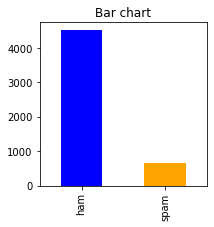

In [18]:
plt.figure(figsize=(3,3))
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

- We can see the label is not balanced wo we need balanced it.

In [19]:
data['Stringlength'] = data['v2'].str.len()
data.head()


,v1,v2,Stringlength
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


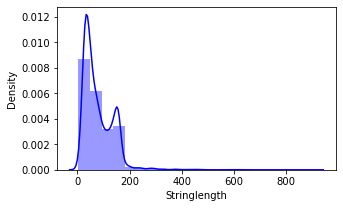

In [20]:
#Distribution of string length
plt.figure(figsize=(5,3))
sns.distplot(data.Stringlength, bins=20, color = 'blue')
plt.show()

- we can see most of the eemails are lies between 0 to 200 words.

### # Manual encoding of labels

In [21]:
label_dict = {'ham': 0, 'spam': 1,}
data.replace({'v1': label_dict}, inplace = True)
data.head()

,v1,v2,Stringlength
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# Splitting the dataset by label
data_h = data[data['v1'] == 0] # ham
data_s = data[data['v1'] == 1] # spam


### Class Frequencies

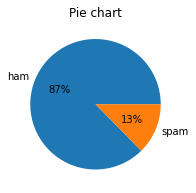

In [23]:
plt.figure(figsize=(3,3))
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

- We can see, the 13.4% of emails is spam but 86.6.
- 86.6% emails are non spam(ham) 

### Number of Characters

Text(0.5, 0.98, 'Distribution of number of characters in v2')

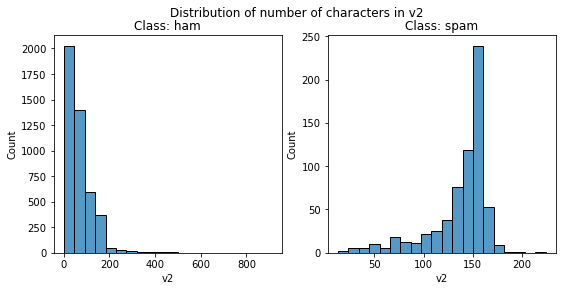

In [24]:
data_h_char = data_h['v2'].str.len()
data_s_char = data_s['v2'].str.len()

fig, ax = plt.subplots(1,2 , figsize = (9, 4), sharey = False)
sns.histplot(x = data_h_char, bins = 20, ax = ax[0]).set_title('Class: ham')
sns.histplot(x = data_s_char, bins = 20, ax = ax[1]).set_title('Class: spam')

fig.suptitle("Distribution of number of characters in v2")

- We can see, that non spam emails are lies between the 0 to 200 characters mostly.
- Spam emails characters mostly lies between the 110 to 160.

### Number of Words

Text(0.5, 0.98, 'Distribution of number of words in v2')

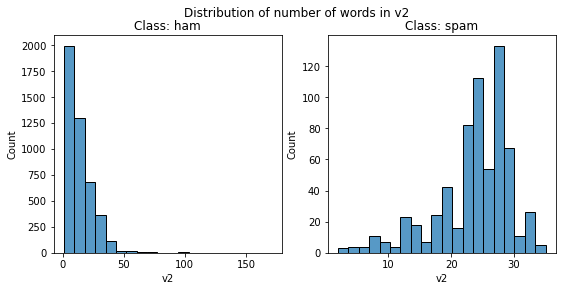

In [25]:
# Distribution of number of words in description
data_h_word = data_h['v2'].str.split().map(lambda x: len(x))
data_s_word = data_s['v2'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(1, 2, figsize = (9,4), sharey = False)
sns.histplot(x = data_h_word, bins = 20, ax = ax[0]).set_title('Class: ham')
sns.histplot(x = data_s_word, bins = 20, ax = ax[1]).set_title('Class: spam')
fig.suptitle("Distribution of number of words in v2")

- The non spam words in emails mostly lies between 0 to 30.
- But in spam mostly number of words lies in between 20 to 30.

## Data Pre-processing

In [26]:
import re
import string

In [27]:
# Convert all messages to lower case
data['v2'] = data['v2'].str.lower()

# Replace email addresses with 'email'
data['v2'] = data['v2'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') 

# Replace URLs with 'webaddress'
data['v2'] = data['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb'
data['v2'] = data['v2'].str.replace(r'£|\$', 'dollars') 

# Replacing 10 digit phone numbers with 'phonenumber'
data['v2'] = data['v2'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'num'
data['v2'] = data['v2'].str.replace(r'\d+(\.\d+)?','num') 

# removing punctuations
data['v2'] = data['v2'].str.replace(r'[^\w\d\s]',' ') 

# removing underscore characters
data['v2'] = data['v2'].str.replace(r'[\_]',' ') 

# removing single characters
data['v2'] = data['v2'].str.replace(r'\s+[a-zA-Z]\s+', ' ') 

#removing whitespace between terms with a single space
data['v2'] = data['v2'].str.replace(r'\s+', ' ') 

# removing leading and trailing whitespace
data['v2'] = data['v2'].str.replace(r'^\s+|\s+?$', ' ') 


In [28]:
data

,v1,v2,Stringlength
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif oni,29
2,1,free entry in num wkly comp to win fa cup fina...,155
3,0,u dun say so early hor c already then say,49
4,0,nah don think he goes to usf he lives around h...,61
...,...,...,...
5567,1,this is the numnd time we have tried num conta...,161
5568,0,will ì going to esplanade fr home,37
5569,0,pity was in mood for that so any other suggest...,57
5570,0,the guy did some bitching but acted like d be ...,125


In [29]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer


In [32]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
data['v2'] = data['v2'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [33]:
lem=WordNetLemmatizer()
data['v2'] = data['v2'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [34]:
data

,v1,v2,Stringlength
0,0,go jurong point crazy available bugis great wo...,111
1,0,ok lar joking wif oni,29
2,1,free entry num wkly comp win fa cup final tkts...,155
3,0,dun say early hor c already say,49
4,0,nah think go usf life around though,61
...,...,...,...
5567,1,numnd time tried num contact ådollarsnum pound...,161
5568,0,ì going esplanade fr home,37
5569,0,pity mood suggestion,57
5570,0,guy bitching acted like interested buying some...,125


In [35]:
data['Cleaned_Stringlength'] = data['v2'].str.len()
data.head()


,v1,v2,Stringlength,Cleaned_Stringlength
0,0,go jurong point crazy available bugis great wo...,111,78
1,0,ok lar joking wif oni,29,21
2,1,free entry num wkly comp win fa cup final tkts...,155,127
3,0,dun say early hor c already say,49,31
4,0,nah think go usf life around though,61,35


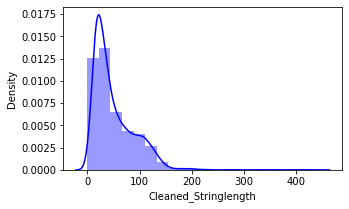

In [36]:
#Distribution of cleaned string length
plt.figure(figsize=(5,3))
sns.distplot(data.Cleaned_Stringlength, bins=20, color = 'blue')
plt.show()

- We can see, word density has been reduced.

In [37]:
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


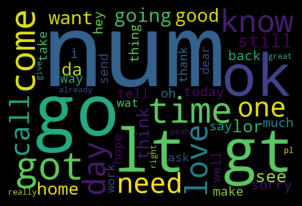

In [38]:
hams = data['v2'][data['v1']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


- We can see, so many emails are not spam.
- num, ok, love, need and scome these are the word are mostly used.

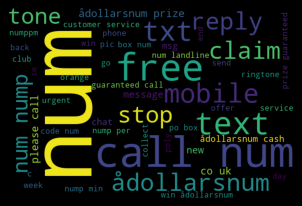

In [39]:
hams = data['v2'][data['v1']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


- We can see, spam emails words that are mostly used as show above.
- txt, call, claim, adollarsnum and mobile these are the words are mostly used.

### Dropping columns 'Cleaned_Stringlength' and 'Stringlength' since they do not contribute to model building

In [40]:
data.drop(columns=[ 'Cleaned_Stringlength','Stringlength' ],inplace = True)

In [41]:
data.head()

,v1,v2
0,0,go jurong point crazy available bugis great wo...
1,0,ok lar joking wif oni
2,1,free entry num wkly comp win fa cup final tkts...
3,0,dun say early hor c already say
4,0,nah think go usf life around though


In [42]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [43]:
features = tf_vec.fit_transform(data['v2'])

In [44]:
X = features
y=data['v1']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Balancing out classes in Label column using SMOTE technique

In [46]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)


### This is a Classification problem since Target column ('v1') has only two Catergory

In [47]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")


Best Accuracy is: 0.9966789667896679 on random_state: 10


In [48]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = 0.3,random_state = 10)

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

### Random Forest Classifier

In [50]:
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 99.98%

==========================Test Result=======================
Accuracy Score: 99.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1371
           1       1.00      0.99      1.00      1339

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710


 Confusion Matrix: 
 [[1370    1]
 [   8 1331]]


### Cross - validation for random forest

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [54]:
for j in range(4,10):
    cross = cross_val_score(rf,X,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')


At cv:- 4
Cross validation score is:- 97.7944917739962
accuracy_score is:- 99.6678966789668


At cv:- 5
Cross validation score is:- 97.85256740334904
accuracy_score is:- 99.6678966789668


At cv:- 6
Cross validation score is:- 97.8911731444129
accuracy_score is:- 99.6678966789668


At cv:- 7
Cross validation score is:- 97.96847504527626
accuracy_score is:- 99.6678966789668


At cv:- 8
Cross validation score is:- 97.96853541709534
accuracy_score is:- 99.6678966789668


At cv:- 9
Cross validation score is:- 97.98791428908076
accuracy_score is:- 99.6678966789668




In [54]:
lsscore_selected = cross_val_score(rf,X,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)


The cv score is:  0.9792980861485634 
The accuracy score is:  0.9966789667896679


# Logistic Regression

In [55]:
lr = lr=LogisticRegression()
lr.fit(x_train,y_train)

metric_score(lr,x_train,x_test,y_train, y_test, train=True)

metric_score(lr,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 98.58%

==========================Test Result=======================
Accuracy Score: 98.49%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1371
           1       0.99      0.98      0.98      1339

    accuracy                           0.98      2710
   macro avg       0.98      0.98      0.98      2710
weighted avg       0.98      0.98      0.98      2710


 Confusion Matrix: 
 [[1355   16]
 [  25 1314]]


### Cross - validation for logistic Regression

In [56]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)


In [57]:
for j in range(4,10):
    cross = cross_val_score(lr,X,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 96.45960686142817
accuracy_score is:- 98.4870848708487


At cv:- 5
Cross validation score is:- 96.49837752616276
accuracy_score is:- 98.4870848708487


At cv:- 6
Cross validation score is:- 96.61417280397532
accuracy_score is:- 98.4870848708487


At cv:- 7
Cross validation score is:- 96.67224074135193
accuracy_score is:- 98.4870848708487


At cv:- 8
Cross validation score is:- 96.73038458041641
accuracy_score is:- 98.4870848708487


At cv:- 9
Cross validation score is:- 96.69167971182817
accuracy_score is:- 98.4870848708487




In [58]:
lsscore_selected = cross_val_score(lr,X,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)


The cv score is:  0.9673038458041641 
The accuracy score is:  0.9848708487084871


### Complement Naive Bayes

In [59]:
CNB = ComplementNB()
CNB.fit(x_train,y_train)

metric_score(CNB,x_train,x_test,y_train, y_test, train=True)

metric_score(CNB,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 98.69%

==========================Test Result=======================
Accuracy Score: 98.12%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1371
           1       0.97      1.00      0.98      1339

    accuracy                           0.98      2710
   macro avg       0.98      0.98      0.98      2710
weighted avg       0.98      0.98      0.98      2710


 Confusion Matrix: 
 [[1325   46]
 [   5 1334]]


### Cross - validation for Complement Naive Bayes

In [60]:
pred_cnb = CNB.predict(x_test)
accu = accuracy_score(y_test,pred_cnb)


In [61]:
for j in range(4,10):
    cross = cross_val_score(CNB,X,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 91.37158526861717
accuracy_score is:- 98.11808118081181


At cv:- 5
Cross validation score is:- 91.23637562001343
accuracy_score is:- 98.11808118081181


At cv:- 6
Cross validation score is:- 91.23635891645625
accuracy_score is:- 98.11808118081181


At cv:- 7
Cross validation score is:- 91.25569653144822
accuracy_score is:- 98.11808118081181


At cv:- 8
Cross validation score is:- 91.21702451419029
accuracy_score is:- 98.11808118081181


At cv:- 9
Cross validation score is:- 91.27519399417596
accuracy_score is:- 98.11808118081181




In [62]:
lsscore_selected = cross_val_score(lr,X,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)


The cv score is:  0.9645960686142817 
The accuracy score is:  0.9811808118081181


### XGBClassifier

In [63]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 99.60%

==========================Test Result=======================
Accuracy Score: 99.11%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1371
           1       0.99      0.99      0.99      1339

    accuracy                           0.99      2710
   macro avg       0.99      0.99      0.99      2710
weighted avg       0.99      0.99      0.99      2710


 Confusion Matrix: 
 [[1359   12]
 [  12 1327]]


### Cross - Validation for XGBOOST

In [64]:
pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)


In [65]:
for j in range(4,10):
    cross = cross_val_score(xgb,X,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')


At cv:- 4
Cross validation score is:- 97.71706246303626
accuracy_score is:- 99.11439114391143


At cv:- 5
Cross validation score is:- 97.94933537554698
accuracy_score is:- 99.11439114391143


At cv:- 6
Cross validation score is:- 97.79427418072656
accuracy_score is:- 99.11439114391143


At cv:- 7
Cross validation score is:- 97.89099331163426
accuracy_score is:- 99.11439114391143


At cv:- 8
Cross validation score is:- 97.79435690325914
accuracy_score is:- 99.11439114391143


At cv:- 9
Cross validation score is:- 97.81376559107208
accuracy_score is:- 99.11439114391143




In [66]:
lsscore_selected = cross_val_score(xgb,X,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)


The cv score is:  0.9794933537554698 
The accuracy score is:  0.9911439114391144


### SVC

In [67]:
from sklearn.svm import SVC

In [68]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 99.95%

==========================Test Result=======================
Accuracy Score: 99.70%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1371
           1       1.00      1.00      1.00      1339

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710


 Confusion Matrix: 
 [[1368    3]
 [   5 1334]]


### Cross - Validation for SVC

In [69]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [70]:
for j in range(4,10):
    cross = cross_val_score(svc,X,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')


At cv:- 4
Cross validation score is:- 97.5043338864426
accuracy_score is:- 99.70479704797049


At cv:- 5
Cross validation score is:- 97.52369111393642
accuracy_score is:- 99.70479704797049


At cv:- 6
Cross validation score is:- 97.5234960337671
accuracy_score is:- 99.70479704797049


At cv:- 7
Cross validation score is:- 97.54282319548501
accuracy_score is:- 99.70479704797049


At cv:- 8
Cross validation score is:- 97.65905752197568
accuracy_score is:- 99.70479704797049


At cv:- 9
Cross validation score is:- 97.63971788786212
accuracy_score is:- 99.70479704797049




In [71]:
lsscore_selected = cross_val_score(svc,X,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)


The cv score is:  0.9765905752197568 
The accuracy score is:  0.9970479704797048


## ROC AUC curves

In [73]:
!pip install scikit-plot

In [74]:
import scikitplot as sktplt

In [75]:
lr_prob = lr.predict_proba(x_test)
rf_prob = rf.predict_proba(x_test)
#svc_prob = svc.predict_proba(x_test)
xgb_prob = xgb.predict_proba(x_test)
cnb_prob = CNB.predict_proba(x_test)

<Figure size 72x72 with 0 Axes>

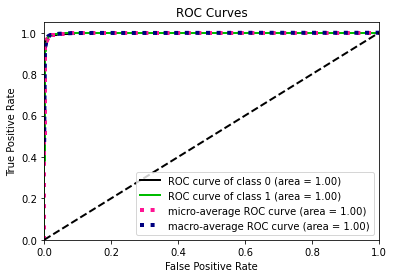

In [76]:
#Logistic Regression ROC Curves
plt.figure(figsize=(1,1))
sktplt.metrics.plot_roc(y_test,lr_prob) 
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

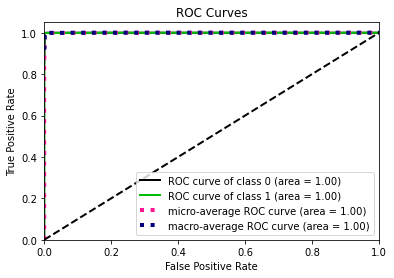

In [77]:
sktplt.metrics.plot_roc(y_test,rf_prob) # Random Forest Classifier ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

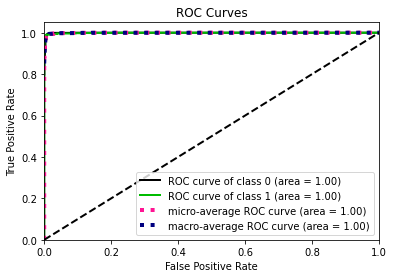

In [78]:
sktplt.metrics.plot_roc(y_test,xgb_prob) #Xgb Classifier ROC Curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

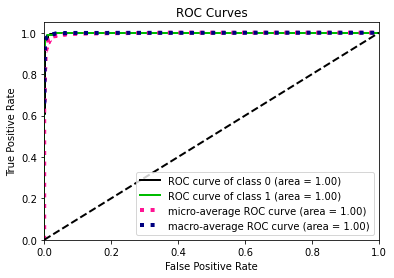

In [79]:
sktplt.metrics.plot_roc(y_test,cnb_prob) #Complement Naive Bayes ROC Curves

### Based on comparing the above graphs,Precision, Recall, Accuracy Scores with Cross validation scores, it is determined that  Complement Naive Bayes Classifier is the best model for the dataset.

## Hyper Parameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'norm': [True, False],
         # 'class_prior': [None, [0.1,]* len(n_classes), ]
         }

complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=ComplementNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False], 'norm': [True, False]},
             verbose=5)

In [82]:
complement_nb_grid.best_score_

0.9852891879721819

In [83]:
complement_nb_grid.best_params_

{'alpha': 0.01, 'fit_prior': True, 'norm': False}

In [84]:
cnb = ComplementNB(alpha = 0.01, fit_prior = True, norm = False)
cnb.fit(x_train,y_train)

metric_score(cnb,x_train,x_test,y_train, y_test, train=True)

metric_score(cnb,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 99.35%

==========================Test Result=======================
Accuracy Score: 98.63%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1371
           1       0.97      1.00      0.99      1339

    accuracy                           0.99      2710
   macro avg       0.99      0.99      0.99      2710
weighted avg       0.99      0.99      0.99      2710


 Confusion Matrix: 
 [[1336   35]
 [   2 1337]]


### Saving The Model

In [85]:
import joblib
joblib.dump(cnb,"spam_email_classifier.pkl")

['spam_email_classifier.pkl']

### Loading The Model

In [86]:
mod=joblib.load("spam_email_classifier.pkl")

In [87]:
mod.predict(x_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [88]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y[2895]})
Prediction_accuracy.head()

,Predictions,Actual Values
0,1,1
1,0,1
2,0,1
3,0,1
4,1,1


### Conclusions
- Spam emails have become a major concern for the internet community as it poses a threat to integrity and productivity of the users. Filtering of email is very much necessary for email communication. The accurate detection of spam emails is a big issue and many filtering methods have been proposed by variousresearc
- Not only does spam filtering help keep garbage out of email inboxes, it helps with the quality of life of business emails because they run smoothly and are only used for their desired purpose.
- Since email is commonly used as a way to exploit users and their data, spam filtering has grown in importance and relevance. Organizations must utilize a spam filter to reduce the risk of users clicking on something they shouldn't, in turn keeping their internal data shielded from a cyber attack.
- So that we need to do spam filtering so user more userfriendly. From above model building we got the Complement Naive Bayes Classifier is a best model deciding whether the emails has spam or not.

# Spam Classification By Using LSTM

In [90]:
!pip install keras

In [93]:
!pip install tensorflow

In [94]:
# Importing reqiured Libraries

import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [95]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [97]:
data = pd.read_csv(r"C:\Users\Teja\Downloads\Spam-Project\spam.csv",encoding="ISO-8859-1" )
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [98]:
# Check if there are any null values
data_v1 = data[['v2','v1']]
data_v1.isnull().sum()

v2    0
v1    0
dtype: int64

In [99]:
import re
import string

In [100]:
# Convert all messages to lower case
data['v2'] = data['v2'].str.lower()

# Replace email addresses with 'email'
data['v2'] = data['v2'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') 

# Replace URLs with 'webaddress'
data['v2'] = data['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb'
data['v2'] = data['v2'].str.replace(r'£|\$', 'dollars') 

# Replacing 10 digit phone numbers with 'phonenumber'
data['v2'] = data['v2'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'num'
data['v2'] = data['v2'].str.replace(r'\d+(\.\d+)?','num') 

# removing punctuations
data['v2'] = data['v2'].str.replace(r'[^\w\d\s]',' ') 

# removing underscore characters
data['v2'] = data['v2'].str.replace(r'[\_]',' ') 

# removing single characters
data['v2'] = data['v2'].str.replace(r'\s+[a-zA-Z]\s+', ' ') 

#removing whitespace between terms with a single space
data['v2'] = data['v2'].str.replace(r'\s+', ' ') 

# removing leading and trailing whitespace
data['v2'] = data['v2'].str.replace(r'^\s+|\s+?$', ' ') 


In [101]:
def cleaning(df, stop_words):
    # Converting to lowercase
    df['v2'] = df['v2'].apply(lambda x:
                        ' '.join(x.lower() for x in x.split()))
    
    # Replacing the digit/numbers
    
    df['v2'] = df['v2'].str.replace('d', '')
    
    # Removing stop words
    
    df['v2'] = df['v2'].apply(lambda x:
                        ' '.join(x for x in x.split() if x not in stop_words))
    
    # Lemmatization
    
    df['v2'] = df['v2'].apply(lambda x:
                        ' '.join([Word(x).lemmatize() for x in x.split()]))
    
    return df


stop_words = stopwords.words('english')

data_v1 = cleaning(data_v1, stop_words)    
    

In [102]:
data_v1.head()

,v2,v1
0,"go jurong point, crazy.. available bugis n gre...",ham
1,ok lar... joking wif u oni...,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,u un say early hor... u c alreay say...,ham
4,"nah on't think go usf, life aroun though",ham


<function matplotlib.pyplot.show(close=None, block=None)>

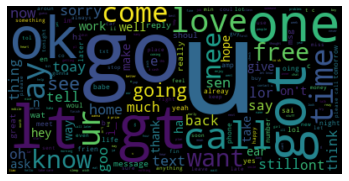

In [103]:
common_words=''
for i in data_v1.v2:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [104]:
# Encoded the target column
lb = LabelEncoder()
data_v1['v1'] = lb.fit_transform(data_v1['v1'])

In [105]:
data_v1.head()

,v2,v1
0,"go jurong point, crazy.. available bugis n gre...",0
1,ok lar... joking wif u oni...,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u un say early hor... u c alreay say...,0
4,"nah on't think go usf, life aroun though",0


In [106]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data_v1['v2'].values)
X = tokenizer.texts_to_sequences(data['v2'].values)
#X = pad_sequences(X)

In [107]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [108]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 72, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 72, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
# Splitting the data into training and testing

y = pd.get_dummies(data_v1['v1'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [110]:
# Converting to array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [111]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
122/122 [==============================] - 34s 244ms/step - loss: 0.2065 - accuracy: 0.9315 - val_loss: 0.0888 - val_accuracy: 0.9737
Epoch 2/10
122/122 [==============================] - 29s 237ms/step - loss: 0.0634 - accuracy: 0.9826 - val_loss: 0.0782 - val_accuracy: 0.9791
Epoch 3/10
122/122 [==============================] - 31s 254ms/step - loss: 0.0506 - accuracy: 0.9877 - val_loss: 0.0877 - val_accuracy: 0.9791
Epoch 4/10
122/122 [==============================] - 31s 255ms/step - loss: 0.0475 - accuracy: 0.9872 - val_loss: 0.0825 - val_accuracy: 0.9809
Epoch 5/10
122/122 [==============================] - 30s 248ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0817 - val_accuracy: 0.9791
Epoch 6/10
122/122 [==============================] - 30s 247ms/step - loss: 0.0330 - accuracy: 0.9908 - val_loss: 0.0861 - val_accuracy: 0.9797
Epoch 7/10
122/122 [==============================] - 30s 247ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0877 - val_ac

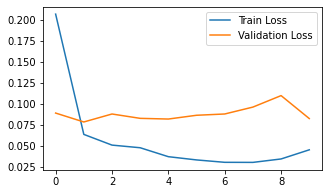

In [112]:
plt.figure(figsize=(5,3))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()

- We can see the loss differeance between train ans validation loss. Validation loss is quite high than train loss.

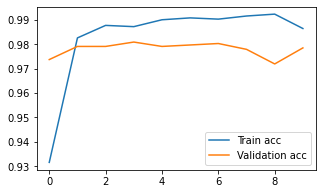

In [113]:
plt.figure(figsize=(5,3))
plt.plot(model.history.history['accuracy'], label='Train acc')
plt.plot(model.history.history['val_accuracy'], label='Validation acc')
plt.legend()

- We can see, training accuracy higher than validation accuracy.

In [114]:
model.save('spam_classifier_LSTM_model.h5')